# Test

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<AxesSubplot:title={'center':'Generated data'}, xlabel='Time (Days)'>

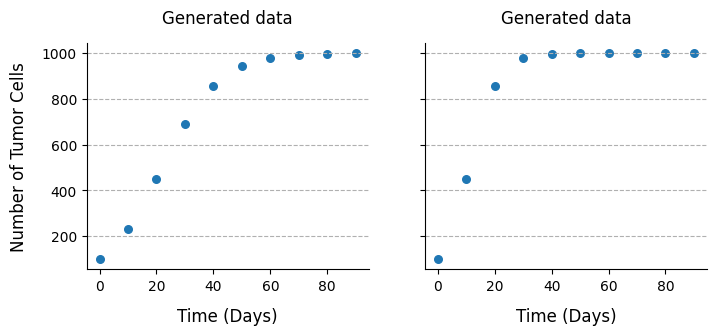

In [3]:
def logistic_growth_model(time, N0, K, r):
    """Returns a NumPy array with the number of cells through time for logistic growth."""
    cells = np.array(np.shape(time))
    cells = K*N0/(N0 + (K-N0)*np.exp(-r*time))
                                                                
    return cells

def plot_growth(time, data, ax, title, ylabel=True):
    """Plots and styles the evolution of cell number through time."""
    ax.scatter(time, data, s=30)
    
    ax.grid(axis='y', linestyle='--')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if ylabel is True:
        ax.set_ylabel('Number of Tumor Cells', fontsize=12, labelpad=10)
        
    ax.set_xlabel('Time (Days)', fontsize=12, labelpad=10)
    ax.set_title(title, fontsize=12, y=1.05)
    
    return ax
    

# Generate logistic growth data
start_time = 0
stop_time = 100
number_time_points = 10
time = np.arange(start_time, stop_time, (stop_time-start_time)/number_time_points)

# Dataset 1
N_0 = 100
proliferation_rate = 0.1
carrying_capacity = 1000

N_data = logistic_growth_model(time, N_0, carrying_capacity, proliferation_rate)

# Dataset 2
proliferation_rate = 0.2
N_data_2 = logistic_growth_model(time, N_0, carrying_capacity, proliferation_rate)


# Plot results
fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=100, sharey=True)

plot_growth(time, N_data, axes[0], 'Generated data')
plot_growth(time, N_data_2, axes[1], 'Generated data', ylabel=False)

In [4]:
def sum_squared_diff(model_data, reference_data):
    """Returns the summ of the squared differences between model and reference data."""
    error = ((model_data - reference_data)**2).sum()
    
    return error

diff = sum_squared_diff(N_data, N_data_2)
print(f'Difference between datasets: {diff}')

Difference between datasets: 319750.4944647962


In [5]:
# Lower proliferation (closer to target)
proliferation_rate = 0.15
N_data_3 = logistic_growth_model(time, N_0, carrying_capacity, proliferation_rate)

diff = sum_squared_diff(N_data, N_data_3)
print(f'Difference between datasets (r={proliferation_rate}): {diff}')

# Higher proliferation
proliferation_rate = 0.3
N_data_3 = logistic_growth_model(time, N_0, carrying_capacity, proliferation_rate)

diff = sum_squared_diff(N_data, N_data_3)
print(f'Difference between datasets (r={proliferation_rate}): {diff}')

Difference between datasets (r=0.15): 132868.67411711058
Difference between datasets (r=0.3): 607278.9243607549


In [6]:


points_per_direction = 8
percent_per_direction = 0.5
about_point = np.array([0.15, 1000])

# Create structures to store data
parameters_in_sweep = np.zeros((2,1))
objective_function = np.zeros((points_per_direction, points_per_direction))
save_x = np.zeros((1, points_per_direction))
save_y = np.zeros((1, points_per_direction))

# Defining search bounds
factor = percent_per_direction
# Proliferation rate bounds
min_prol_limit = about_point[0]-factor*about_point[0]
max_prol_limit = about_point[0]+factor*about_point[0]
prol_sweep = np.linspace(min_prol_limit, max_prol_limit, points_per_direction)
# Carrying capacity bounds 
min_carcap_limit = about_point[1]-factor*about_point[1]
max_carcap_limit = about_point[1]+factor*about_point[1]
carcap_sweep = np.linspace(min_carcap_limit, max_carcap_limit, points_per_direction)

save_x = prol_sweep
save_y = carcap_sweep

# Sweep through the parameter combinations
for a in range(points_per_direction):
    for b in range(points_per_direction):

        # Select parameters and run the model
        parameters_in_sweep[0] = prol_sweep[a]
        parameters_in_sweep[1] = carcap_sweep[b]
        N_model = logistic_growth_model(time, N_0, parameters_in_sweep[1], parameters_in_sweep[0])

        # Compute error
        objective_function[a][b] = sum_squared_diff(N_model, N_data)

# Select best point in the parameter space
# I is optimal index, but in references to a points_per_direction X points_per_direcion
I = np.argmin(objective_function)
x = int(np.floor(I/points_per_direction))
y = int(I-points_per_direction*x)

about_point[0] = prol_sweep[x]
about_point[1] = carcap_sweep[y]

new_x, new_y = [round(about_point[0], 4), round(about_point[1], 4)]
error = objective_function.min()

print(f'Best value found for parameters: ({new_x}, {new_y}); error: {error}')

Best value found for parameters: (0.0964, 1071.4286); error: 21922.635235464462


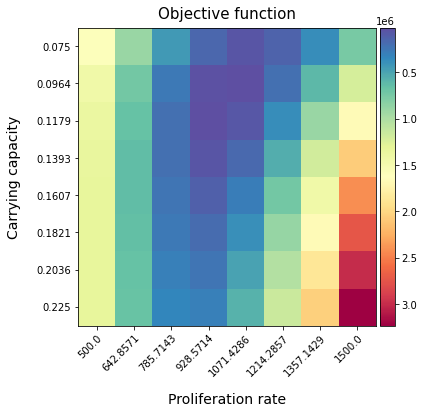

In [7]:


from mpl_toolkits.axes_grid1 import make_axes_locatable

# Plot the objective function
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(objective_function, cmap='Spectral_r')

# Show color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cax.yaxis.set_label('Difference between datasets')
plt.colorbar(im, cax=cax)

# Assign the right parameter values to the grid
ax.set_xticks(np.arange(len(save_y)))
ax.set_yticks(np.arange(len(save_x)))

ax.set_xticklabels(np.round(save_y, 4))
ax.set_yticklabels(np.round(save_x, 4))

# Set labels
ax.set_ylabel('Carrying capacity', labelpad=15, fontsize=14)
ax.set_xlabel('Proliferation rate', labelpad=15, fontsize=14)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title('Objective function', y=1.01, fontsize=15)

plt.gca().invert_yaxis()

fig.tight_layout()
plt.show()

In [8]:
number_of_levels = 7
points_per_direction = 10
percent_per_direction = 0.5
about_point = np.array([0.08, 1100.0])

# Create structures to store data
parameters_in_sweep = np.zeros((2,1))
objective_function = np.zeros((number_of_levels, points_per_direction, points_per_direction))
save_x = np.zeros((number_of_levels, points_per_direction))
save_y = np.zeros((number_of_levels, points_per_direction))

for n in range(number_of_levels):
    
    # Defining search bounds
    factor = percent_per_direction/(n*2+1)
    # Proliferation rate bounds
    min_prol_limit = about_point[0]-factor*about_point[0]
    max_prol_limit = about_point[0]+factor*about_point[0]
    prol_sweep = np.linspace(min_prol_limit, max_prol_limit, points_per_direction)
    # Carrying capacity bounds 
    min_carcap_limit = about_point[1]-factor*about_point[1]
    max_carcap_limit = about_point[1]+factor*about_point[1]
    carcap_sweep = np.linspace(min_carcap_limit, max_carcap_limit, points_per_direction)
    
    save_x[n] = prol_sweep
    save_y[n] = carcap_sweep
    
    # Sweep through the parameter combinations
    for a in range(points_per_direction):
        for b in range(points_per_direction):
            
            # Select parameters and run the model
            parameters_in_sweep[0] = prol_sweep[a]
            parameters_in_sweep[1] = carcap_sweep[b]
            N_model = logistic_growth_model(time, N_0, parameters_in_sweep[1], parameters_in_sweep[0])
            
            # Compute error
            objective_function[n][a][b] = sum_squared_diff(N_model, N_data)

    # Select best point in the parameter space
    # I is optimal index, but in references to a points_per_direction X points_per_direcion
    I = np.argmin(objective_function[n])
    x = int(np.floor(I/points_per_direction))
    y = int(I-points_per_direction*x)
    
    about_point[0] = prol_sweep[x]
    about_point[1] = carcap_sweep[y]
    
    new_x, new_y = [round(about_point[0], 4), round(about_point[1], 4)]
    error = objective_function[n].min()
    
    print(f'New point: {new_x}, {new_y}; error: {round(error, 3)}')

New point: 0.0933, 1038.8889; error: 6454.836
New point: 0.102, 981.1728; error: 1452.895
New point: 0.1008, 992.0748; error: 254.9
New point: 0.1, 999.9484; error: 0.142
New point: 0.0994, 1006.1209; error: 151.741
New point: 0.0999, 1001.0395; error: 4.571
New point: 0.1004, 996.7615; error: 42.337


<IPython.core.display.Javascript object>


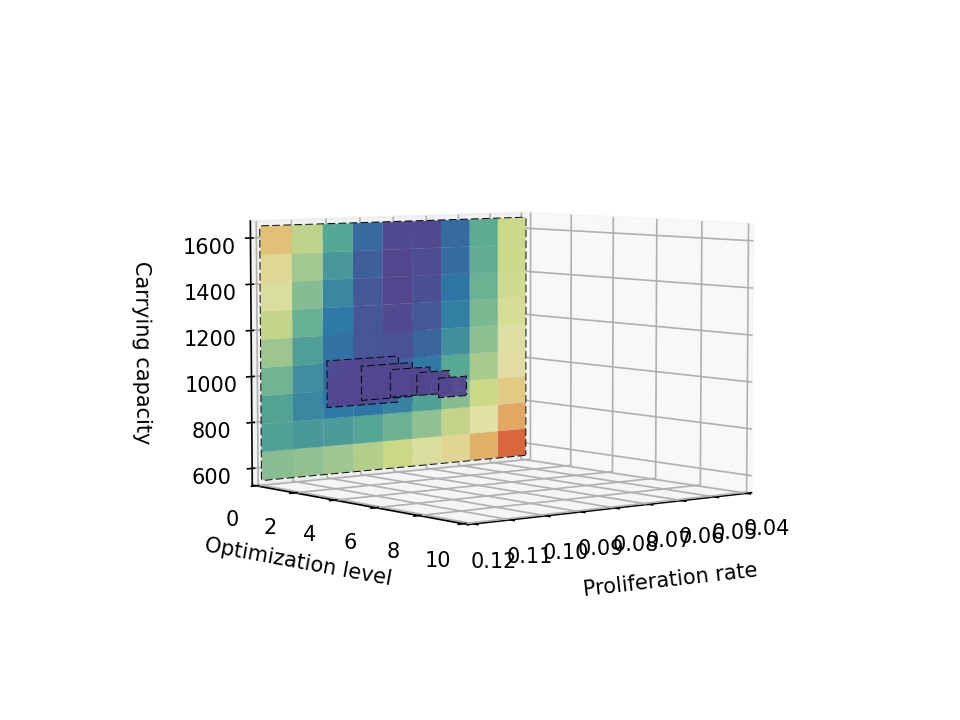

In [9]:
%matplotlib notebook
from matplotlib import cm, colors
from matplotlib.patches import Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
import time as tm

color_dimension = objective_function[0] # change to desired fourth dimension
maxx = color_dimension.max()
minn = 0
norm = colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='Spectral_r')

# Creating figure
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.view_init(elev=5., azim=75)

plt.ion()
fig.show()
fig.canvas.draw()

ax.set_xlabel('Proliferation rate', labelpad=10)
ax.set_zlabel('Carrying capacity', labelpad=10)
ax.set_ylabel('Optimization level', labelpad=5)

for n in range(number_of_levels):
    
    # Get the parameter space
    x, y = np.meshgrid(save_x[n], save_y[n])
    
    width = max(save_x[n]) - min(save_x[n])
    heigth = max(save_y[n]) - min(save_y[n])
    
    p = Rectangle((min(save_x[n]), min(save_y[n])), width, heigth, 
                  edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=n, zdir='y')
    
    # Convert the error data to colormap
    color_dimension = objective_function[n] # change to desired fourth dimension
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    
    # Plot surface using color as a 4th dimension
    ax.plot_surface(x, np.ones((len(prol_sweep), len(prol_sweep)))*n, y,
                    facecolors=fcolors,
                    edgecolor='white', linewidth=0.1, rstride=1, cstride=1,
                    vmin=minn, vmax=maxx)
    ax.set_ylim(0,10)
    ax.set_xlim(min(save_x[0]), max(save_x[0]))
    ax.set_zlim(min(save_y[0]), max(save_y[0]))
    
    fig.canvas.draw()
    tm.sleep(1)

    ax.set_xlabel('Proliferation rate', labelpad=10)
    ax.set_zlabel('Carrying capacity', labelpad=10)
    ax.set_ylabel('Optimization level', labelpad=5)

#fig.colorbar(m, shrink=0.6)

<IPython.core.display.Javascript object>


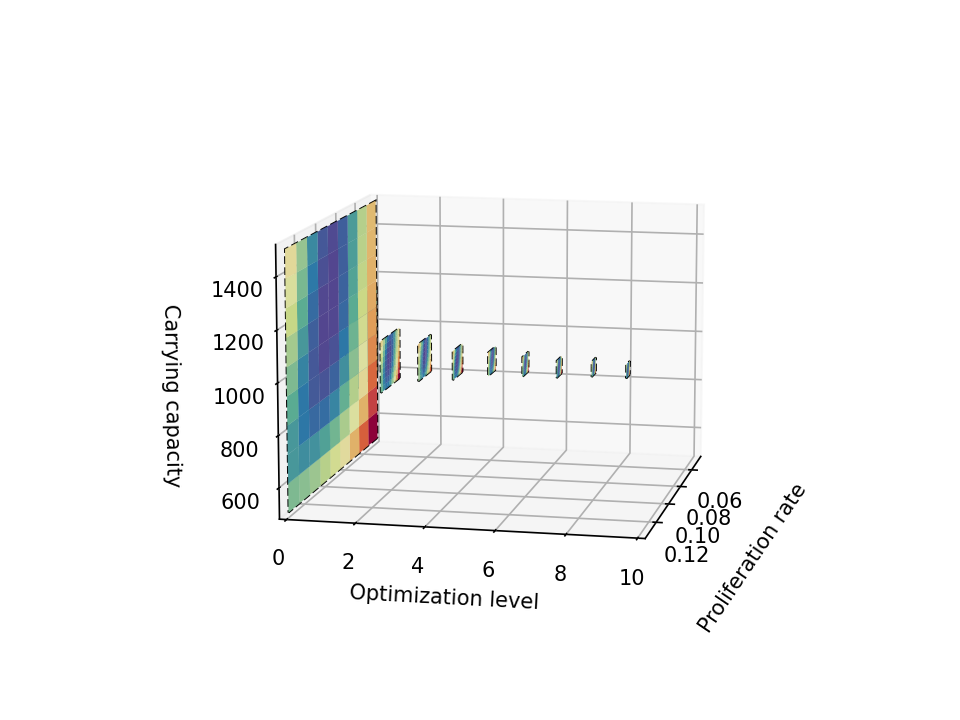

In [11]:


# Creating figure
fig = plt.figure()
ax = plt.axes(projection ='3d')

fig.show()
fig.canvas.draw()

ax.view_init(elev=5., azim=75)

number_of_levels = 10
points_per_direction = 10
percent_per_direction = 0.5
about_point = np.array([0.09, 1000])

parameters_in_sweep = np.zeros((2,1))
objective_function = np.zeros((number_of_levels, points_per_direction, points_per_direction))
save_x = np.zeros((number_of_levels, points_per_direction))
save_y = np.zeros((number_of_levels, points_per_direction))

for n in range(number_of_levels):
    
    # Defining search bounds
    factor = percent_per_direction/(n*2+1)
    # Proliferation rate bounds
    min_prol_limit = about_point[0]-factor*about_point[0]
    max_prol_limit = about_point[0]+factor*about_point[0]
    prol_sweep = np.linspace(min_prol_limit, max_prol_limit, points_per_direction)
    # Carrying capacity bounds 
    min_carcap_limit = about_point[1]-factor*about_point[1]
    max_carcap_limit = about_point[1]+factor*about_point[1]
    carcap_sweep = np.linspace(min_carcap_limit, max_carcap_limit, points_per_direction)
    
    save_x[n] = prol_sweep
    save_y[n] = carcap_sweep
    
    # Sweep through the parameter combinations
    for a in range(points_per_direction):
        for b in range(points_per_direction):
            
            # Select parameters and run the model
            parameters_in_sweep[0] = prol_sweep[a]
            parameters_in_sweep[1] = carcap_sweep[b]
            N_model = logistic_growth_model(time, N_0, parameters_in_sweep[1], parameters_in_sweep[0])
            
            # Compute error
            objective_function[n][a][b] = sum_squared_diff(N_model, N_data)

    # Select best point in the parameter space
    # I is optimal index, but in references to a points_per_direction X points_per_direcion
    I = np.argmin(objective_function[n])
    x = int(np.floor(I/points_per_direction))
    y = int(I-points_per_direction*x)
    
    about_point[0] = prol_sweep[x]
    about_point[1] = carcap_sweep[y]
    
    # Get the parameter space
    x, y = np.meshgrid(save_x[n], save_y[n])
    
    width = max(save_x[n]) - min(save_x[n])
    heigth = max(save_y[n]) - min(save_y[n])
    
    p = Rectangle((min(save_x[n]), min(save_y[n])), width, heigth, 
                  edgecolor='black', facecolor='none', linestyle='--')
    ax.add_patch(p)
    art3d.pathpatch_2d_to_3d(p, z=n, zdir='y')
    
    # Convert the error data to colormap
    color_dimension = objective_function[n] # change to desired fourth dimension
    minn, maxx = color_dimension.min(), color_dimension.max()
    norm = colors.Normalize(minn, maxx)
    m = plt.cm.ScalarMappable(norm=norm, cmap='Spectral_r')
    m.set_array([])
    fcolors = m.to_rgba(color_dimension)
    
    # Plot surface using color as a 4th dimension
    ax.plot_surface(x, np.ones((len(prol_sweep), len(prol_sweep)))*n, y,
                    facecolors=fcolors,
                    edgecolor='white', linewidth=0.1, rstride=1, cstride=1,
                    vmin=minn, vmax=maxx)
    ax.set_ylim(0,10)
    ax.set_xlim(min(save_x[0]), max(save_x[0]))
    ax.set_zlim(min(save_y[0]), max(save_y[0]))
    
    fig.canvas.draw()
    tm.sleep(1)

    ax.set_xlabel('Proliferation rate', labelpad=10)
    ax.set_zlabel('Carrying capacity', labelpad=10)
    ax.set_ylabel('Optimization level', labelpad=5)

